In [46]:
from gerador import gerador_instancias
import pandas as pd
import matplotlib
import time
import random

## Implementação simples dos algoritmos para construção e consulta em uma Segment Tree de soma

In [47]:
def constroi_seg_tree_soma(l: int, r: int, no: int = 1) -> None:  # custo O(N)
    if no == 1: # primeira entrada na função    
        global st, arr
        st = [0] * (4*len(arr)) # tamanho da árvore é O(4n)
    
    if( l == r ):
        st[no] = arr[l] # nós folhas (caso base)
        return None
    
    else:
        m = (l + r) // 2

        constroi_seg_tree_soma(l, m, no*2) # calcula o filho da esquerda recursivamente
        constroi_seg_tree_soma(m + 1, r, no*2+1,) # calcula o filho da direita recursivamente
        
        st[no] = st[no*2] + st[no*2 + 1] # o valor de um vértice interno é soma dos valores dos seus filhos
        
        return None

In [48]:
def consulta_soma_seg_tree(l_no: int , r_no: int , l: int , r: int, no: int = 1) -> int: # custo O(log2 N)
    global st

    if l > r: # intervalo inválido
        return 0

    if l <= l_no and r_no <= r: # intervalo desejado está dentro do intervalo do nó
        return st[no]

    m = (l_no + r_no) // 2

    filho_esq = 0
    filho_dir = 0

    if l <= m:
        filho_esq = consulta_soma_seg_tree(l_no, m, l, min(r, m), no * 2) # acha soma do filho esquerdo do nó recursivamente
    if r > m:
        filho_dir = consulta_soma_seg_tree(m + 1, r_no, max(l, m + 1), r, no * 2 + 1) # acha soma do filho direito do nó recursivamente

    return filho_esq + filho_dir

In [49]:
def consulta_soma_iterativo(l: int, r:int) -> int: # custo O(N)
    global arr

    soma = 0
    
    for i in range(l, min(r + 1, len(arr))):
        soma += arr[i]
    
    return soma

In [50]:
arr = [1, 3, -2, 8,-7]

constroi_seg_tree_soma(0, 4)

print(st)


print(consulta_soma_seg_tree(0, 4, 0, 1))


print(consulta_soma_iterativo(0, 1))


[0, 3, 2, 1, 4, -2, 8, -7, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
4
4


In [51]:
instancias = gerador_instancias(500, 5, 1000)
tamanho_col = []
tempo_construcao_col = []
tempo_consulta_col = []  
tempo_consulta_iterativo_col = []

for i in range(len(instancias)):
    
    arr = instancias[i]
    tam_inst = len(arr)
    
    
    # calcula tempo de construção da árvore para instância atual
    start_time = time.time()

    arvore = constroi_seg_tree_soma(0, tam_inst-1)

    tempo_construcao = time.time() - start_time

    #indices aleatorios pra consulta
    idx_aleat_inf = random.randint(0, tam_inst//2) # indice aleatorio na primeira metade do vetor 
    idx_aleat_sup = random.randint(tam_inst//2 + 1, tam_inst) # indice aleatorio na segunda metade do vetor


    # calcula tempo de consulta da soma de um intervalo aleatório na árvore da instância atual
    start_time = time.time()

    consulta_soma_seg_tree(0, tam_inst-1, idx_aleat_inf, idx_aleat_sup)

    tempo_consulta = time.time() - start_time

    
    # calcula tempo de consulta da soma do mesmo intervalo aleatório de maneira iterativa
    start_time = time.time()

    consulta_soma_iterativo(idx_aleat_inf, idx_aleat_sup)

    tempo_consulta_iter = time.time() - start_time




    tamanho_col.append(tam_inst)

    tempo_construcao_col.append(tempo_construcao)

    tempo_consulta_col.append(tempo_consulta)

    tempo_consulta_iterativo_col.append(tempo_consulta_iter)

In [52]:
df = pd.DataFrame(columns=["tamanho", "tempo_construcao"])

df["tamanho"] = tamanho_col
df["tempo_construcao"] = tempo_construcao_col
df["tempo_consulta_arvore"] = tempo_consulta_col 
df["tempo_consulta_iter"]  = tempo_consulta_iterativo_col

In [53]:
df

,tamanho,tempo_construcao,tempo_consulta_arvore,tempo_consulta_iter
0,423,0.000216,0.000012,0.000016
1,839,0.000389,0.000005,0.000042
2,689,0.000315,0.000009,0.000019
3,392,0.000168,0.000010,0.000013
4,241,0.000094,0.000007,0.000007
...,...,...,...,...
495,107,0.000041,0.000003,0.000004
496,300,0.000113,0.000007,0.000010
497,550,0.000223,0.000008,0.000029
498,479,0.000200,0.000008,0.000017


<Axes: xlabel='tamanho', ylabel='tempo_construcao'>

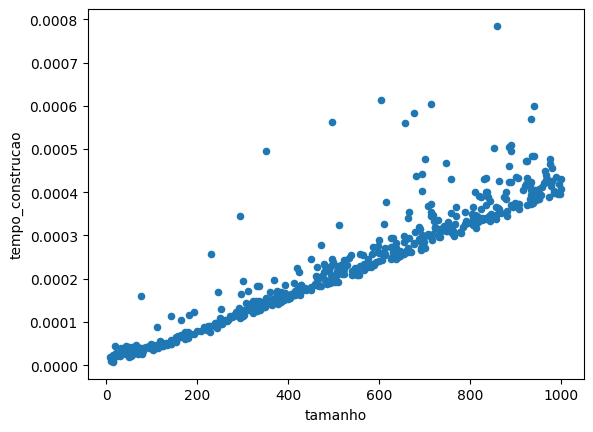

In [54]:
df.plot("tamanho", "tempo_construcao", "scatter")

<Axes: xlabel='tamanho', ylabel='tempo_consulta_arvore'>

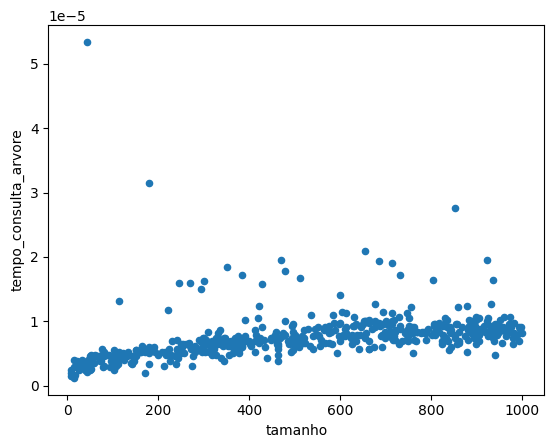

In [55]:
df.plot("tamanho", "tempo_consulta_arvore", "scatter")

<Axes: xlabel='tamanho', ylabel='tempo_consulta_iter'>

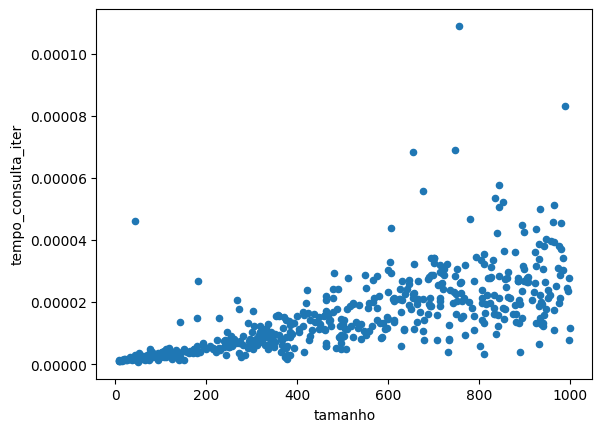

In [56]:
df.plot("tamanho", "tempo_consulta_iter", "scatter")